In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

iris=sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X=pca.fit_transform(iris.drop(labels="species",axis=1))

In [4]:
pca.explained_variance_ratio_*100

array([92.46187232,  5.30664831,  1.71026098])

In [5]:
X=pd.DataFrame(X,columns=["PC1","PC2","PC3"])
X=X.join(iris["species"])
X

,PC1,PC2,PC3,species
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa
...,...,...,...,...
145,1.944110,0.187532,0.177825,virginica
146,1.527167,-0.375317,-0.121898,virginica
147,1.764346,0.078859,0.130482,virginica
148,1.900942,0.116628,0.723252,virginica


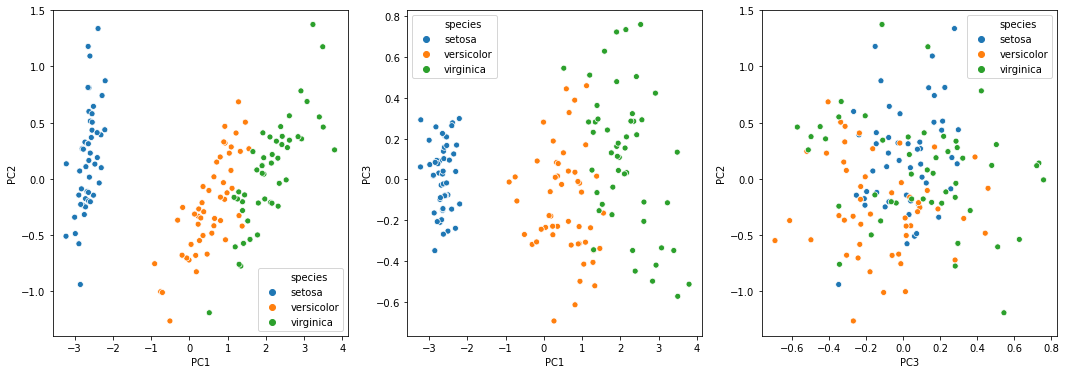

In [6]:
fig,ax=plt.subplots(1,3,figsize=(18,6))
sns.scatterplot(X["PC1"],X["PC2"],hue=X["species"],ax=ax[0])
sns.scatterplot(X["PC1"],X["PC3"],hue=X["species"],ax=ax[1])
sns.scatterplot(X["PC3"],X["PC2"],hue=X["species"],ax=ax[2])

Text(0.5, 0, 'PC3')

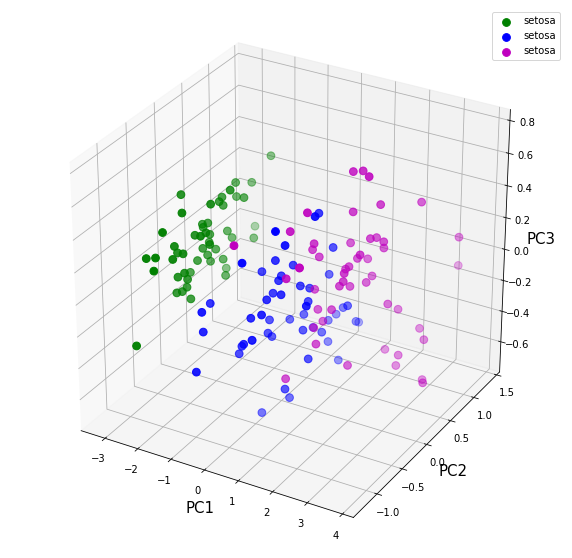

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection="3d")
colors = ['g', 'b', 'm']
j=0
for i in X.species.unique():
    ax.scatter(X.loc[X[X.species==i].index[::],"PC1"],
               X.loc[X[X.species==i].index[::],"PC2"],
               X.loc[X[X.species==i].index[::],"PC3"],
               s=60,depthshade=True,c=colors[j])
    j+=1

ax.legend(X.species)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)